In [2]:
import pandas as pd
df = pd.read_csv('weatherAUS.csv')
df.head(2)

'''from google.colab import drive
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/weatherAUS.csv')'''

"from google.colab import drive\nimport pandas as pd\ndf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/weatherAUS.csv')"

In [3]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [4]:
df = df.drop(columns = 'Date')

In [5]:
df = df.dropna()

In [6]:
df.shape

(56420, 22)

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_location = le.fit_transform(df['Location'])
label_WindGustDir = le.fit_transform(df['WindGustDir'])
label_WindDir9am = le.fit_transform(df['WindDir9am'])
label_WindDir3pm = le.fit_transform(df['WindDir3pm'])
label_RainToday = le.fit_transform(df['RainToday'])
label_RainTomorrow = le.fit_transform(df['RainTomorrow'])

df['Location'] = label_location
df['WindGustDir'] = label_WindGustDir
df['WindDir9am'] = label_WindDir9am
df['WindDir3pm'] = label_WindDir3pm
df['RainToday'] = label_RainToday
df['RainTomorrow'] = label_RainTomorrow

df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,4,17.9,35.2,0.0,12.0,12.3,11,48.0,1,12,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
6050,4,18.4,28.9,0.0,14.8,13.0,8,37.0,10,10,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
6052,4,19.4,37.6,0.0,10.8,10.6,5,46.0,5,6,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
6053,4,21.9,38.4,0.0,11.4,12.2,14,31.0,14,15,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
6054,4,24.2,41.0,0.0,11.2,8.4,14,35.0,7,14,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0


In [8]:
t = df.drop(columns = ['Location','WindGustDir', 'WindDir9am', 'WindDir3pm','RainToday', 'RainTomorrow' ])
t
from sklearn.preprocessing import MinMaxScaler
t_new = MinMaxScaler().fit_transform(t)
t = pd.DataFrame(t_new)
t.reset_index(inplace = True ,drop = True)
t.columns = [ 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine',  'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']
t

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.645669,0.706818,0.0,0.147783,0.848276,0.339130,0.061538,0.243243,0.20,0.13,0.430718,0.441748,0.250,0.555556,0.680798,0.700472
1,0.658793,0.563636,0.0,0.182266,0.896552,0.243478,0.261538,0.229730,0.30,0.08,0.540902,0.566343,0.125,0.111111,0.523691,0.549528
2,0.685039,0.761364,0.0,0.133005,0.731034,0.321739,0.430769,0.175676,0.42,0.22,0.530885,0.519417,0.125,0.666667,0.733167,0.735849
3,0.750656,0.779545,0.0,0.140394,0.841379,0.191304,0.061538,0.054054,0.37,0.22,0.537563,0.517799,0.125,0.555556,0.743142,0.752358
4,0.811024,0.838636,0.0,0.137931,0.579310,0.226087,0.230769,0.148649,0.19,0.15,0.504174,0.490291,0.125,0.666667,0.855362,0.799528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,0.682415,0.665909,0.0,0.073892,0.758621,0.226087,0.107692,0.243243,0.63,0.32,0.557596,0.540453,0.000,0.111111,0.628429,0.674528
56416,0.732283,0.647727,0.0,0.093596,0.593103,0.243478,0.169231,0.121622,0.56,0.28,0.569282,0.551780,0.875,0.000000,0.635910,0.667453
56417,0.719160,0.652273,0.0,0.068966,0.758621,0.208696,0.230769,0.121622,0.46,0.23,0.580968,0.561489,0.000,0.000000,0.635910,0.669811
56418,0.687664,0.629545,0.0,0.076355,0.731034,0.147826,0.107692,0.202703,0.62,0.58,0.574290,0.543689,0.125,0.111111,0.635910,0.601415


In [9]:
df1 = df[['Location','WindGustDir', 'WindDir9am', 'WindDir3pm','RainToday', 'RainTomorrow' ]]
df1.reset_index(inplace = True,drop = True)
df1

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,4,11,1,12,0,0
1,4,8,10,10,0,0
2,4,5,5,6,0,0
3,4,14,14,15,0,0
4,4,14,7,14,0,0
...,...,...,...,...,...,...
56415,6,1,9,4,0,0
56416,6,0,9,9,0,0
56417,6,0,0,13,0,0
56418,6,2,9,6,0,0


In [10]:
df2 = pd.concat([df1, t], axis=1)
df2

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,MinTemp,MaxTemp,Rainfall,Evaporation,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,4,11,1,12,0,0,0.645669,0.706818,0.0,0.147783,...,0.061538,0.243243,0.20,0.13,0.430718,0.441748,0.250,0.555556,0.680798,0.700472
1,4,8,10,10,0,0,0.658793,0.563636,0.0,0.182266,...,0.261538,0.229730,0.30,0.08,0.540902,0.566343,0.125,0.111111,0.523691,0.549528
2,4,5,5,6,0,0,0.685039,0.761364,0.0,0.133005,...,0.430769,0.175676,0.42,0.22,0.530885,0.519417,0.125,0.666667,0.733167,0.735849
3,4,14,14,15,0,0,0.750656,0.779545,0.0,0.140394,...,0.061538,0.054054,0.37,0.22,0.537563,0.517799,0.125,0.555556,0.743142,0.752358
4,4,14,7,14,0,0,0.811024,0.838636,0.0,0.137931,...,0.230769,0.148649,0.19,0.15,0.504174,0.490291,0.125,0.666667,0.855362,0.799528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,6,1,9,4,0,0,0.682415,0.665909,0.0,0.073892,...,0.107692,0.243243,0.63,0.32,0.557596,0.540453,0.000,0.111111,0.628429,0.674528
56416,6,0,9,9,0,0,0.732283,0.647727,0.0,0.093596,...,0.169231,0.121622,0.56,0.28,0.569282,0.551780,0.875,0.000000,0.635910,0.667453
56417,6,0,0,13,0,0,0.719160,0.652273,0.0,0.068966,...,0.230769,0.121622,0.46,0.23,0.580968,0.561489,0.000,0.000000,0.635910,0.669811
56418,6,2,9,6,0,0,0.687664,0.629545,0.0,0.076355,...,0.107692,0.202703,0.62,0.58,0.574290,0.543689,0.125,0.111111,0.635910,0.601415


In [11]:
df.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [12]:
df2.Location.value_counts()

6     3062
15    3025
1     2953
9     2929
16    2913
20    2870
23    2730
10    2594
12    2465
13    2464
2     2444
21    2419
22    2416
0     2223
14    2008
7     1939
11    1913
8     1898
17    1863
25    1734
19    1690
18    1678
5     1380
24    1198
3     1078
4      534
Name: Location, dtype: int64

In [13]:
df2.corr()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,MinTemp,MaxTemp,Rainfall,Evaporation,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
Location,1.000000,0.099918,-0.033247,0.085732,-0.006037,-0.005100,-0.155954,-0.147500,-0.043314,-0.011509,...,0.061993,0.099761,0.107279,0.026147,0.088567,0.120987,0.018257,0.010527,-0.194449,-0.148955
WindGustDir,0.099918,1.000000,0.430859,0.619892,0.148775,0.061751,-0.190554,-0.244508,0.067350,-0.104656,...,0.007952,0.085679,0.096059,0.053719,-0.118875,-0.022979,0.078431,0.079285,-0.233490,-0.258929
WindDir9am,-0.033247,0.430859,1.000000,0.320818,0.181461,0.035992,-0.058310,-0.246043,0.098980,-0.130683,...,-0.007907,0.094271,0.165935,0.189645,-0.034289,0.060506,0.115243,0.069308,-0.152185,-0.252951
WindDir3pm,0.085732,0.619892,0.320818,1.000000,0.128209,0.032203,-0.194123,-0.200750,0.059229,-0.072357,...,0.031568,0.067029,0.054109,-0.004667,-0.120668,-0.021374,0.049014,0.057746,-0.212512,-0.214044
RainToday,-0.006037,0.148775,0.181461,0.128209,1.000000,0.309098,0.048953,-0.221810,0.550515,-0.218079,...,0.083125,0.085627,0.379451,0.385440,-0.186848,-0.104103,0.297794,0.272034,-0.096946,-0.228515
RainTomorrow,-0.005100,0.061751,0.035992,0.032203,0.309098,1.000000,0.087428,-0.147467,0.254342,-0.130002,...,0.083904,0.088862,0.271033,0.455358,-0.254816,-0.230418,0.323972,0.388574,-0.018179,-0.183586
MinTemp,-0.155954,-0.190554,-0.058310,-0.194123,0.048953,0.087428,1.000000,0.749687,0.110800,0.506764,...,0.108522,0.137273,-0.174991,0.070827,-0.475661,-0.495577,0.106177,0.042173,0.906295,0.727222
MaxTemp,-0.147500,-0.244508,-0.246043,-0.200750,-0.221810,-0.147467,0.749687,1.000000,-0.069981,0.650964,...,-0.008171,0.012266,-0.495781,-0.448116,-0.350980,-0.451691,-0.263634,-0.257752,0.893387,0.984841
Rainfall,-0.043314,0.067350,0.098980,0.059229,0.550515,0.254342,0.110800,-0.069981,1.000000,-0.077239,...,0.050584,0.044112,0.263625,0.277625,-0.180606,-0.137302,0.217169,0.191433,0.013713,-0.074627
Evaporation,-0.011509,-0.104656,-0.130683,-0.072357,-0.218079,-0.130002,0.506764,0.650964,-0.077239,1.000000,...,0.193154,0.124345,-0.554232,-0.422436,-0.297319,-0.325954,-0.199809,-0.202366,0.593122,0.630727


In [14]:
X = df.drop(columns='RainTomorrow') 
y = df['RainTomorrow'] 

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# XGBoost

In [15]:
from xgboost import XGBClassifier
clf = XGBClassifier(n_estimators=100, learning_rate=0.05)
clf.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:02:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [16]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
a = pd.DataFrame() 
a['pred'] = list(y_pred)
a['real'] = list(y_test)
a.head()

,pred,real
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0


In [18]:
a['pred'].value_counts()

0    9553
1    1731
Name: pred, dtype: int64

In [19]:
a['real'].value_counts()

0    8786
1    2498
Name: real, dtype: int64

In [20]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.8605990783410138

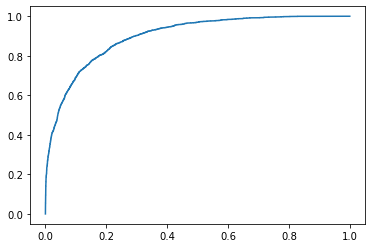

In [21]:
y_pred_proba = clf.predict_proba(X_test)
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(y_test, y_pred_proba[:,1])
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.show()

In [22]:
from sklearn.metrics import roc_auc_score
roc_score = roc_auc_score(y_test, y_pred_proba[:,1])
roc_score

0.899169779711773

In [23]:
features = X.columns  
importances = clf.feature_importances_

importances_df = pd.DataFrame()
importances_df['features'] = features
importances_df['importances'] = importances
importances_df.sort_values('importances', ascending=False)

,features,importances
13,Humidity3pm,0.302690
5,Sunshine,0.161547
17,Cloud3pm,0.077774
15,Pressure3pm,0.062075
7,WindGustSpeed,0.059614
3,Rainfall,0.038174
0,Location,0.031012
8,WindDir9am,0.028934
6,WindGustDir,0.025561
9,WindDir3pm,0.025418


In [24]:
from sklearn.model_selection import GridSearchCV  
parameters = {'max_depth': [1, 3, 5], 'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.05, 0.1, 0.2]}
clf = XGBClassifier()  
grid_search = GridSearchCV(clf, parameters, scoring='roc_auc', cv=5)  

In [25]:
"""grid_search.fit(X_train, y_train) 
grid_search.best_params_ """

'grid_search.fit(X_train, y_train) \ngrid_search.best_params_ '

In [26]:
##### optimization

from xgboost import XGBClassifier
clf = XGBClassifier(n_estimators=150, learning_rate=0.2, max_depth = 5)
clf.fit(X_train, y_train)

y_pred_proba = clf.predict_proba(X_test)

from sklearn.metrics import roc_auc_score
roc_score = roc_auc_score(y_test, y_pred_proba[:,1])
roc_score

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:02:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9045844460681225

# KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN(n_neighbors=27)  
knn.fit(X_train, y_train)

y_pred_proba = knn.predict_proba(X_test)

roc_score = roc_auc_score(y_test, y_pred_proba[:,1])
roc_score

0.8831630521808751

In [47]:
'''s_list = {}
for i in range(1,30):
    knn = KNN(n_neighbors=i)  
    knn.fit(X_train, y_train)
    y_pred_proba = knn.predict_proba(X_test)
    roc_score = roc_auc_score(y_test, y_pred_proba[:,1])
    s_list[i] = roc_score
s_list'''

{1: 0.7114412221787446,
 2: 0.7785619800187976,
 3: 0.8097156988053452,
 4: 0.8307220326682471,
 5: 0.8400186117480373,
 6: 0.8478659321720978,
 7: 0.8562326756465496,
 8: 0.860589268136567,
 9: 0.8660610710284594,
 10: 0.8680199565981034,
 11: 0.8697560825806103,
 12: 0.8715680033213914,
 13: 0.8728889098075638,
 14: 0.8739049514138968,
 15: 0.8759409530811537,
 16: 0.8763980681472108,
 17: 0.8766227186165049,
 18: 0.8776185984070661,
 19: 0.8789102076106595,
 20: 0.879277015967429,
 21: 0.8800935125519036,
 22: 0.8808904396451376,
 23: 0.881017470475356,
 24: 0.8814426455801563,
 25: 0.8825261894013275,
 26: 0.8826952980549703,
 27: 0.8831630521808751,
 28: 0.8829769028061056,
 29: 0.8831448495923988}

# Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5, random_state=123) 
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

dct_roc_score = roc_auc_score(y_test, y_pred_proba[:,1])
print(dct_roc_score)

0.8597094839541106


# LightGBM

In [53]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

from sklearn.metrics import roc_auc_score
LightGBM_score = roc_auc_score(y_test, y_pred_proba[:,1])
LightGBM_score

0.904063838368669

In [64]:
####Optimize 
parameters = {'num_leaves': [10, 15, 30 , 60 , 120], 'n_estimators': [10, 20, 60 ,120], 'learning_rate': [0.05, 0.1, 0.2]}
model = LGBMClassifier() 
grid_search = GridSearchCV(model, parameters, scoring='roc_auc', cv=5)

grid_search.fit(X_train, y_train) 
grid_search.best_params_

{'learning_rate': 0.05, 'n_estimators': 120, 'num_leaves': 120}

In [61]:
model = LGBMClassifier(num_leaves=60, n_estimators=60,learning_rate=0.1)
model.fit(X_train, y_train)

LGBMClassifier(n_estimators=60, num_leaves=60)

In [62]:
y_pred_proba = model.predict_proba(X_test)
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, y_pred_proba[:, 1])
score

0.9031986800457895

# AdaBoost

In [65]:
from sklearn.ensemble import AdaBoostClassifier
aclf = AdaBoostClassifier(random_state=123)
aclf.fit(X_train, y_train)

AdaBoostClassifier(random_state=123)

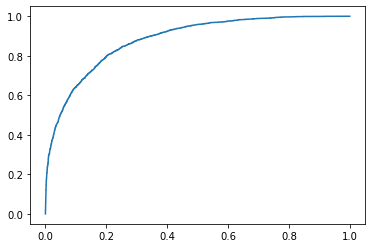

In [66]:
y_pred_proba = aclf.predict_proba(X_test)
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(y_test.values, y_pred_proba[:,1])
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.show()

In [67]:
from sklearn.metrics import roc_auc_score
adascore = roc_auc_score(y_test, y_pred_proba[:,1])
print(adascore)

0.8818933362032217


# GBDT

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
gmodel = GradientBoostingClassifier(random_state=123)
gmodel.fit(X_train, y_train)




GradientBoostingClassifier(random_state=123)

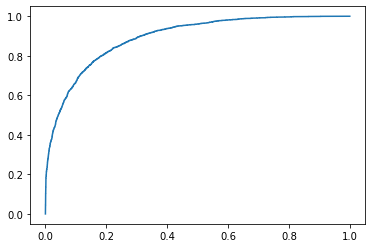

In [71]:
y_pred_proba = gmodel.predict_proba(X_test)
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(y_test.values, y_pred_proba[:,1])
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.show()

In [72]:
from sklearn.metrics import roc_auc_score
gscore = roc_auc_score(y_test, y_pred_proba[:,1])
print(gscore)

0.8927885308474415


# SMOTE

In [18]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_smotesampled, y_smotesampled = smote.fit_resample(X, y)

In [20]:
from collections import Counter
Counter(y_smotesampled)

Counter({0: 43993, 1: 43993})

In [21]:
"""from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smotesampled, y_smotesampled, test_size=0.2, random_state=123)"""

'from sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X_smotesampled, y_smotesampled, test_size=0.2, random_state=123)'

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [23]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(X_smotesampled, y_smotesampled)

LGBMClassifier()

In [24]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

from sklearn.metrics import roc_auc_score
LightGBM_score = roc_auc_score(y_test, y_pred_proba[:,1])
LightGBM_score

0.9180852991065742

# 2